In [66]:
# 🏏 ICC Men's T20 World Cup Data Analysis

### 📌 Objective:
#To analyze match trends, venue performance, winning patterns, and weather impact in the ICC Mens T20 World Cup.

### 📊 Tools Used:
#- Python
#- Pandas
#- Matplotlib
#- Seaborn

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [48]:
df = pd.read_csv("E:\ICC Mens T20 Worldcup.csv")
df.head()

,Match No.,Date,Venue,1st Team,2nd Team,Stage,Toss Winning,Toss Decision,First Innings Score,Fall of wickets First Innings,...,Winners,Method,Won by,Winning Margin,Top Scorer,Highest Score,Best Bowler,Best Bowler Figure(Wickets Taken),Best Bowler Figure(Runs Recieved),Player Of The Match
0,1st,"Saturday,June 1,2024","Grand Prairie Stadium, Dallas",Canada,United State Of America,Group A,United State Of America,Fielding,194,5,...,United State Of America,Normal Match,Wickets,7,Aaron Jones,94,Dilon Heyliger,1,19,Aaron Jones
1,2nd,"Sunday,June 2,2024","Providence Stadium, Guyana",Papua New Guinea,Afghanistan,Group C,Afghanistan,Fielding,95,10,...,Afghanistan,Normal Match,Wickets,7,Gulbadin Naib,49,Fazalhaq Farooqi,3,16,Fazalhaq Farooqi
2,3rd,"Sunday,June 2,2024","Kensington Oval, Bridgetown, Barbados",Oman,Namibia,Group B,Namibia,Fielding,109,10,...,Namibia,Normal Match,Wickets,4,Jan Frylinck,45,Mehran Khan,3,7,David Wiese
3,4th,"Monday,June 3,2024","Nassau County International Cricket Stadium, N...",Sri Lanka,South Africa,Group D,Sri Lanka,Batting,77,10,...,South Africa,Normal Match,Wickets,6,Quinton de Kock,20,Anrich Nortje,4,7,Anrich Nortje
4,5th,"Monday,June 3,2024","Providence Stadium, Guyana",Afghanistan,Uganda,Group C,Uganda,Fielding,183,5,...,Afghanistan,Normal Match,Runs,125,Rahmanullah Gurbaz,76,Fazalhaq Farooqi,5,9,Fazalhaq Farooqi


In [67]:
## 🔍 Dataset Overview
#Understanding structure, columns, and data types.

In [18]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Match No.                          55 non-null     object
 1   Date                               55 non-null     object
 2   Venue                              55 non-null     object
 3   1st Team                           55 non-null     object
 4   2nd Team                           55 non-null     object
 5   Stage                              55 non-null     object
 6   Toss Winning                       55 non-null     object
 7   Toss Decision                      55 non-null     object
 8   First Innings Score                55 non-null     object
 9   Fall of wickets First Innings      55 non-null     object
 10  Second Innings Score               55 non-null     object
 11  Fall of wickets Second Innings     55 non-null     object
 12  Winners   

,Match No.,Date,Venue,1st Team,2nd Team,Stage,Toss Winning,Toss Decision,First Innings Score,Fall of wickets First Innings,...,Winners,Method,Won by,Winning Margin,Top Scorer,Highest Score,Best Bowler,Best Bowler Figure(Wickets Taken),Best Bowler Figure(Runs Recieved),Player Of The Match
count,55,55,55,55,55,55,55,55,55,55,...,55,55,55,55,55,55,55,55,55,55
unique,55,26,9,19,18,9,19,3,41,9,...,17,3,3,29,39,38,41,8,28,44
top,1st,"Friday,June 14,2024","Kensington Oval, Bridgetown, Barbados",India,England,Group A,England,Fielding,106,10,...,South Africa,Normal Match,Runs,7,Rain,Rain,Rain,3,16,Rain
freq,1,3,9,6,7,11,6,42,4,16,...,8,48,26,9,4,4,4,25,6,4


In [49]:
df.isnull().sum()

Match No.                            0
Date                                 0
Venue                                0
1st Team                             0
2nd Team                             0
Stage                                0
Toss Winning                         0
Toss Decision                        0
First Innings Score                  0
Fall of wickets First Innings        0
Second Innings Score                 0
Fall of wickets Second Innings       0
Winners                              0
Method                               0
Won by                               0
Winning Margin                       0
Top Scorer                           0
Highest Score                        0
Best Bowler                          0
Best Bowler Figure(Wickets Taken)    0
Best Bowler Figure(Runs Recieved)    0
Player Of The Match                  0
dtype: int64

In [20]:
df.shape
df.columns
df['Winners'].value_counts()

Winners
South Africa               8
India                      8
Afghanistan                6
Australia                  5
Rain                       4
England                    4
West Indies                4
Bangladesh                 3
New Zealand                2
Pakistan                   2
United State Of America    2
Scotland                   2
Canada                     1
Uganda                     1
Netherlands                1
Namibia                    1
Sri Lanka                  1
Name: count, dtype: int64

In [1]:
## 🪙 Analysis 1: Does Toss Winner Also Win the Match?

#This analysis checks whether winning the toss gives a competitive advantage.
#We compare Toss Winner with Match Winner.


In [21]:
df['Toss_Match_Win'] = df['Toss Winning'] == df['Winners']

In [22]:
df['Toss_Match_Win']

0      True
1      True
2      True
3     False
4     False
5     False
6      True
7      True
8      True
9     False
10     True
11    False
12    False
13    False
14     True
15     True
16    False
17     True
18    False
19    False
20     True
21     True
22     True
23     True
24     True
25    False
26    False
27     True
28     True
29     True
30    False
31     True
32     True
33    False
34     True
35     True
36    False
37    False
38     True
39    False
40    False
41     True
42     True
43     True
44    False
45     True
46    False
47    False
48     True
49     True
50    False
51     True
52    False
53    False
54     True
Name: Toss_Match_Win, dtype: bool

In [23]:
df['Toss_Match_Win'].mean() * 100

np.float64(56.36363636363636)

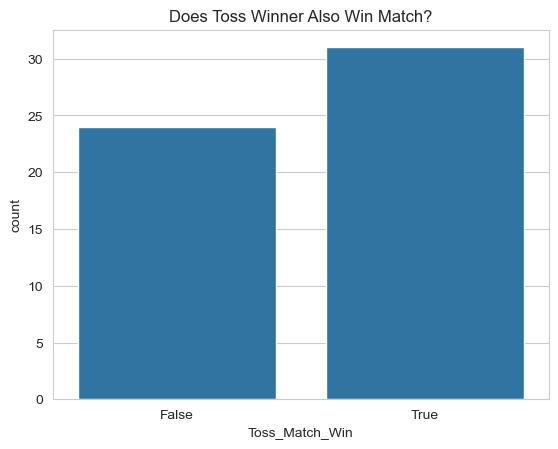

In [24]:
sns.countplot(x='Toss_Match_Win', data=df)
plt.title("Does Toss Winner Also Win Match?")
plt.show()

In [2]:
### 📊 Insight:

#-  31 matches were won by the team that won the toss.
#- 24 matches were won by the team that lost the toss.
#- This suggests that toss advantage is significant.
#Conclusion: Toss plays a strategic role but does not guarantee victory.


In [3]:
## 🏏 Analysis 2: Chasing vs Defending – Which Strategy Wins More?

#This analysis examines whether teams have a higher success rate while chasing a target or defending a total.


In [25]:
df["Chase_win"]= df["Won by"]=="Wickets"

In [26]:
df["Chase_win"]

0      True
1      True
2      True
3      True
4     False
5     False
6      True
7      True
8      True
9     False
10    False
11     True
12    False
13    False
14     True
15     True
16    False
17    False
18    False
19     True
20    False
21     True
22    False
23     True
24     True
25    False
26    False
27     True
28     True
29    False
30    False
31     True
32    False
33    False
34     True
35     True
36    False
37    False
38     True
39    False
40    False
41     True
42    False
43    False
44    False
45     True
46    False
47    False
48     True
49     True
50    False
51    False
52     True
53    False
54    False
Name: Chase_win, dtype: bool

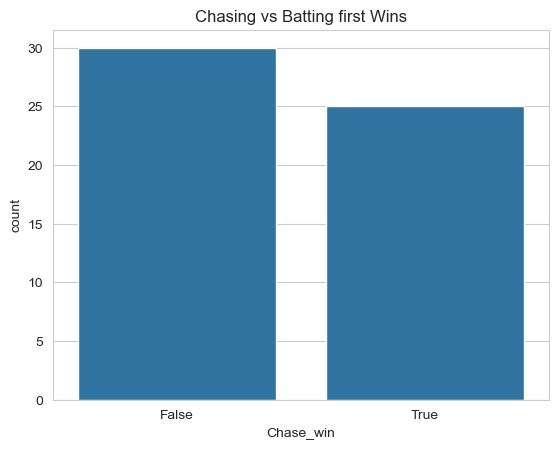

In [27]:
sns.countplot(data=df,x=df["Chase_win"])
plt.title("Chasing vs Batting first Wins")
plt.show()

In [ ]:
### 📊 Insight:

#- 30 matches (54.5%) were won by teams Defending.
#- 25 matches (45.5%) were won by teams Chasing.

#This indicates that Defending provides a slight advantage in the tournament.


In [4]:
## 📊 Analysis 3: Distribution of First Innings Scores

#This analysis examines how first-innings scores are distributed across matches
#to understand whether the tournament was high-scoring or low-scoring.


In [28]:
df['First Innings Score'] = pd.to_numeric(df['First Innings Score'], errors='coerce')


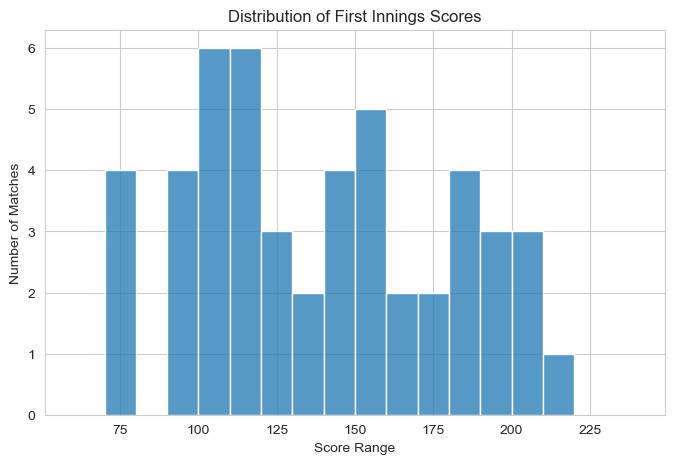

In [29]:
bins = np.arange(60, 241, 10)   # 10-run intervals (best for cricket scores)

plt.figure(figsize=(8,5))
sns.histplot(df['First Innings Score'], bins=bins)

plt.title("Distribution of First Innings Scores")
plt.xlabel("Score Range")
plt.ylabel("Number of Matches")

plt.show()

In [30]:
df['First Innings Score'].mean()

np.float64(133.8653846153846)

In [5]:
### 📊 Insight:

#- The average first-innings score is approximately 134 runs.
#- Most scores fall between 100 and 170 runs.
#- Very few matches crossed the 200-run mark.
#- The distribution shows moderate scoring conditions.

#Conclusion:
#The tournament appears to have been balanced, with teams scoring above 150 gaining a competitive edge.

In [6]:
## 🏟 Venue-wise Average First Innings Score

#This analysis examines how average first-innings scores vary across different venues 
#to understand pitch behavior and scoring conditions.


In [31]:
venue_avg = df.groupby('Venue')['First Innings Score'].mean().sort_values(ascending=False)

venue_avg


Venue
Daren Sammy National Cricket Stadium, Gros Islet, St Lucia       191.166667
Kensington Oval, Bridgetown, Barbados                            146.555556
Grand Prairie Stadium, Dallas                                    145.750000
Providence Stadium, Guyana                                       138.000000
Sir Vivian Richards Stadium, North Sound, Antigua                132.000000
Arnos Vale Ground, Kingstown, St Vincent                         128.600000
Nassau County International Cricket Stadium, New York            107.625000
Central Broward Regional Park Stadium Turf Ground, Lauderhill    106.000000
Brian Lara Stadium, Tarouba, Trinidad                             83.600000
Name: First Innings Score, dtype: float64

In [32]:
venue_avg = venue_avg.reset_index()


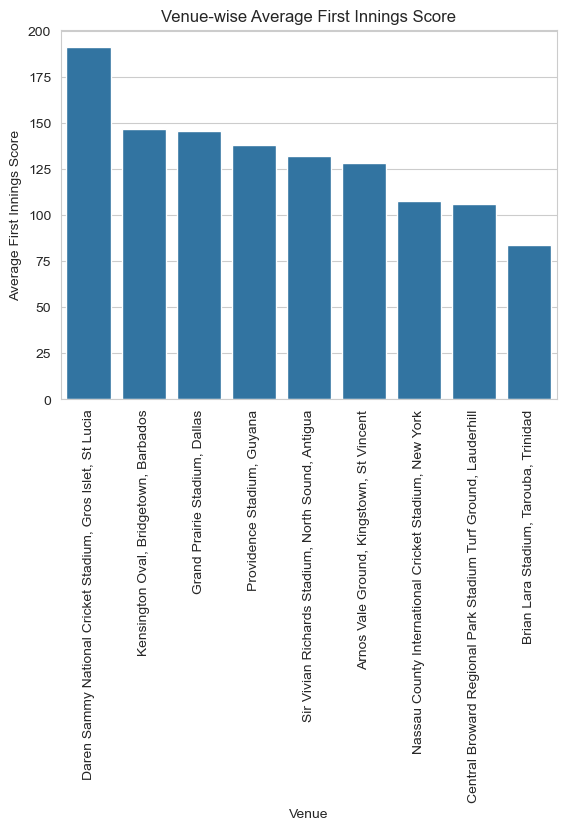

In [42]:
sns.barplot(data=venue_avg,x='Venue',y='First Innings Score')
plt.xticks(rotation=90)
plt.title("Venue-wise Average First Innings Score")
plt.xlabel("Venue")
plt.ylabel("Average First Innings Score")

plt.show()

In [7]:
### 📊 Observations:

#- Gros Islet, St Lucia has the highest average first-innings score (~190), indicating a batting-friendly pitch.
#- Bridgetown (Barbados) and Dallas also show relatively high scoring averages.
#- Providence (Guyana), Antigua, and St Vincent fall in the moderate scoring range.
#- Tarouba, Trinidad records the lowest average (~85), suggesting bowling-friendly conditions.
#- New York and Lauderhill appear to favor bowlers compared to other venues.

In [43]:
df.groupby('Stage')['First Innings Score'].mean()


Stage
1st Semi-Final     56.000000
2nd Semi-Final    141.000000
Final             176.000000
Group 1           164.166667
Group 2           144.200000
Group A           135.666667
Group B           129.000000
Group C           126.700000
Group D           122.666667
Name: First Innings Score, dtype: float64

In [34]:
df['1st Team'].value_counts().add(
    df['2nd Team'].value_counts(),
    fill_value=0
).astype(int)


Afghanistan                9
Australia                  7
Bangladesh                 7
Canada                     4
England                    8
India                      9
Ireland                    4
Namibia                    4
Nepal                      4
Netherlands                4
New Zealand                4
Oman                       4
Pakistan                   4
Papua New Guinea           4
Scotland                   4
South Africa               9
Sri Lanka                  4
Uganda                     4
United State Of America    7
West Indies                6
Name: count, dtype: int64

In [40]:
df['Winners'].value_counts()

Winners
South Africa               8
India                      8
Afghanistan                6
Australia                  5
Rain                       4
England                    4
West Indies                4
Bangladesh                 3
New Zealand                2
Pakistan                   2
United State Of America    2
Scotland                   2
Canada                     1
Uganda                     1
Netherlands                1
Namibia                    1
Sri Lanka                  1
Name: count, dtype: int64

In [8]:
## 🏆 Team Win Percentage Analysis

#This analysis evaluates the win percentage of each team 
#to identify the most consistent and dominant performers in the tournament.


In [50]:
df_clean = df[
    df['Winners'].notna() & 
    ~df['Winners'].str.contains('No Result|Abandoned|NR|Rain', case=False, na=False)
]


In [51]:
matches_played = pd.concat([df_clean['1st Team'], df_clean['2nd Team']]).value_counts()
wins = df['Winners'].value_counts()
win_percentage = wins.div(matches_played, fill_value=0) * 100
win_percentage = win_percentage.sort_values(ascending=False)
win_percentage

Rain                              inf
India                      100.000000
South Africa                88.888889
Australia                   71.428571
Afghanistan                 66.666667
Scotland                    66.666667
West Indies                 66.666667
England                     57.142857
Pakistan                    50.000000
New Zealand                 50.000000
Bangladesh                  42.857143
Canada                      33.333333
Sri Lanka                   33.333333
United State Of America     33.333333
Namibia                     25.000000
Netherlands                 25.000000
Uganda                      25.000000
Nepal                        0.000000
Ireland                      0.000000
Oman                         0.000000
Papua New Guinea             0.000000
Name: count, dtype: float64

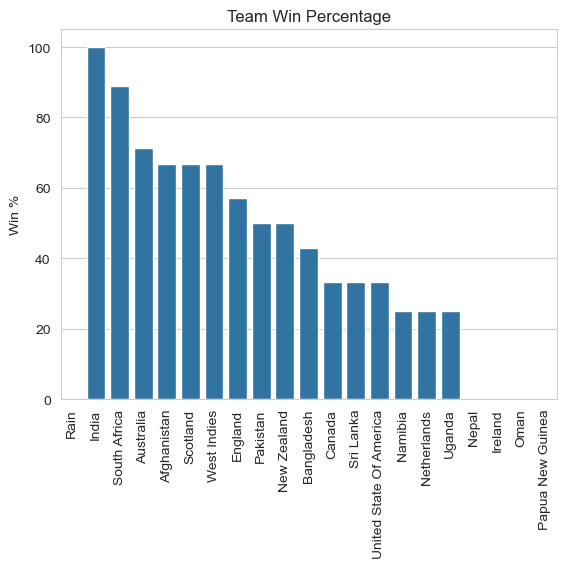

In [54]:
sns.barplot(data=win_percentage)
plt.xticks(rotation=90)
plt.title("Team Win Percentage")
plt.ylabel("Win %")
plt.show()


In [ ]:
### 📊 Observations:

#- India shows one of the highest win percentages, indicating strong tournament performance.
#- South Africa and Australia also demonstrate high consistency.
#- Afghanistan, Scotland, and West Indies fall into the mid-performance range.
#- Teams like Namibia, Netherlands, and Uganda have lower win percentages.
#- A few teams recorded very limited or no wins during the tournament.


In [ ]:
## 🌧 Proportion of Rain-Affected Matches by Team

#This analysis examines how rain interruptions were distributed across teams 
#to understand the external impact of weather conditions on the tournament.


In [61]:
rain_matches = df[
    df['Winners'].str.contains('Rain', case=False, na=False)
]
rain_matches

,Match No.,Date,Venue,1st Team,2nd Team,Stage,Toss Winning,Toss Decision,First Innings Score,Fall of wickets First Innings,...,Winners,Method,Won by,Winning Margin,Top Scorer,Highest Score,Best Bowler,Best Bowler Figure(Wickets Taken),Best Bowler Figure(Runs Recieved),Player Of The Match
5,6th,"Tuesday,June 4,2024","Kensington Oval, Bridgetown, Barbados",Scotland,England,Group B,Scotland,Batting,90,0,...,Rain,Rain,Rain,Rain,Rain,Rain,Rain,Rain,Rain,Rain
22,23th,"Tuesday,June 11,2024",Central Broward Regional Park Stadium Turf Gro...,Nepal,Sri Lanka,Group D,Rain,Rain,Rain,Rain,...,Rain,Rain,Rain,Rain,Rain,Rain,Rain,Rain,Rain,Rain
29,30th,"Friday,June 14,2024",Central Broward Regional Park Stadium Turf Gro...,United State Of America,Ireland,Group A,Rain,Rain,Rain,Rain,...,Rain,Rain,Rain,Rain,Rain,Rain,Rain,Rain,Rain,Rain
32,33th,"Saturday,June 15,2024",Central Broward Regional Park Stadium Turf Gro...,Canada,India,Group A,Rain,Rain,Rain,Rain,...,Rain,Rain,Rain,Rain,Rain,Rain,Rain,Rain,Rain,Rain


In [63]:
rain_team1 = rain_matches['1st Team'].value_counts()
rain_team2 = rain_matches['2nd Team'].value_counts()

rain_total = rain_team1.add(rain_team2, fill_value=0)
rain_total = rain_total.sort_values(ascending=False)

rain_total


Canada                     1.0
England                    1.0
India                      1.0
Ireland                    1.0
Nepal                      1.0
Scotland                   1.0
Sri Lanka                  1.0
United State Of America    1.0
Name: count, dtype: float64

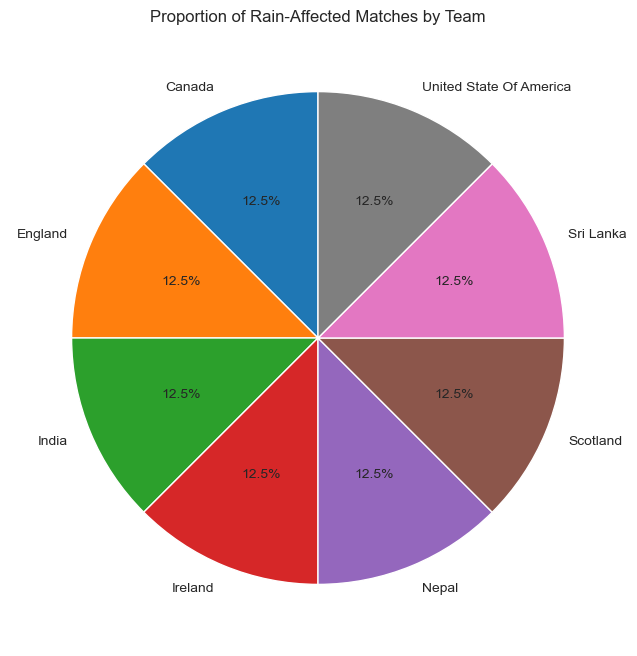

In [64]:
plt.figure(figsize=(8,8))

plt.pie(
    rain_total,
    labels=rain_total.index,
    autopct='%1.1f%%',
    startangle=90
)

plt.title("Proportion of Rain-Affected Matches by Team")
plt.show()


In [9]:
### 📊 Observations:

#- The rain-affected matches appear evenly distributed among the listed teams.
#- Each of the teams shown accounts for approximately 12.5% of the total rain-affected matches.
#- No single team was disproportionately impacted by weather interruptions.


In [ ]:
# 🏏 Final Project Conclusion

#This analysis of the ICC Men's T20 World Cup provided key insights into match dynamics, team performance, scoring trends, venue behavior, and weather impact.

### 🔎 Key Findings:

#- Toss Impact: Teams winning the toss had a slight advantage (~56%), but it did not guarantee match victory.
#- Chasing vs Defending: Defending teams won slightly more matches (54.5%), indicating a moderate advantage in defending the target.
#- Score Distribution: The average first-innings score was approximately 134 runs, with most matches falling between 100–170 runs, suggesting balanced playing conditions.
#- Venue Analysis: Significant variation in scoring patterns across venues highlighted the influence of pitch conditions on match outcomes.
#- Team Win Percentage: Top-performing teams demonstrated consistency and strong execution across matches.
#- Rain Impact: Rain-affected matches were evenly distributed among teams, indicating no major weather-based competitive imbalance.

### 🎯 Overall Insight:

#The tournament showcased a balanced competition where strategy, adaptability, and performance consistency played a more decisive role than external factors like toss or weather.

#This project demonstrates how exploratory data analysis can uncover meaningful patterns in sports datasets and support data-driven insights.
